# Discovering High Utility Frequent patterns in Big Data Using HUFIM Algorithm

In this tutorial, we will discuss the first approach to find High Utility Frequent patterns in big data using HUFIM algorithm.

[__Basic approach:__](#basicApproach) Here, we generalize the basic approach by presenting the steps to discover High Utility Frequent patterns using single multiple minimum support value.

***

## <a id='basicApproach'>Basic approach: Executing HUFIM on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the HUFIM algorithm

In [1]:
from PAMI.highUtilityFrequentPatterns.basic import HUFIM  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'utility_mushroom.txt'

minimumSupportCount = 2000  #Users can also specify this constraint between 0 to 1.
minUtilCount = 30000
seperator = ' '       

#### Step 3: Execute the HUFIM algorithm

In [3]:
obj = alg.HUFIM(iFile=inputFile,minUtil=minUtilCount, minSup=minimumSupportCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

High Utility Frequent patterns were generated successfully using HUFIM algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.save(outFile='utilityFrequentPatterns.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 6610


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 5.6160054206848145


##### Step 5.3: Total Memory consumed by the mining algorithm

In [8]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 131383296
Memory (USS): 92872704


# Advanced Tutorial on Implementing HUFIM Algorithm

In this tutorial, we will discuss the second approach to find High Utility Frequent patterns in big data using HUFIM algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover High Utility Frequent patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the HUFIM algorithm  can be implemented by varying the minimum utility values

#### Step 1: Import the HUFIM algorithm and pandas data frame

In [1]:
from PAMI.highUtilityFrequentPatterns.basic import HUFIM  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'utility_mushroom.txt'
minSupList=[2200, 2400, 2600, 2800, 3000]
minUtil = 50000
seperator = ' '
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of HMiner algorithm

#### Step 3: Execute the HUFIM algorithm using a for loop

In [3]:
algorithm = 'HUFIM'  #specify the algorithm name
for minSup in minSupList:
    obj = alg.HUFIM(iFile=inputFile, minSup=minSup, minUtil=minUtil, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSup, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

High Utility Frequent patterns were generated successfully using HUFIM algorithm
High Utility Frequent patterns were generated successfully using HUFIM algorithm
High Utility Frequent patterns were generated successfully using HUFIM algorithm
High Utility Frequent patterns were generated successfully using HUFIM algorithm
High Utility Frequent patterns were generated successfully using HUFIM algorithm


In [4]:
print(result)

  algorithm  minSup  patterns   runtime     memory
0     HUFIM    2200      4080  3.543843  131469312
1     HUFIM    2400      3947  4.024087  132210688
2     HUFIM    2600      2628  3.182598  132505600
3     HUFIM    2800      1997  3.207395  132505600
4     HUFIM    3000      1420  2.779103  132591616


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

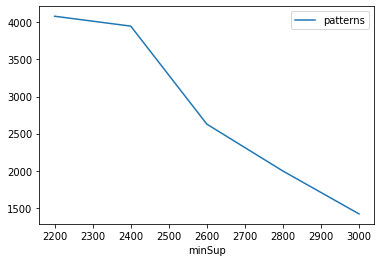

Graph for No Of Patterns is successfully generated!


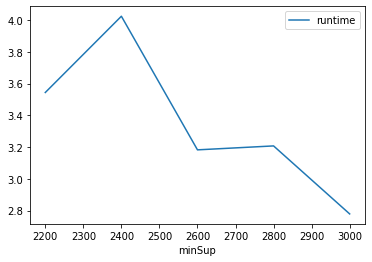

Graph for Runtime taken is successfully generated!


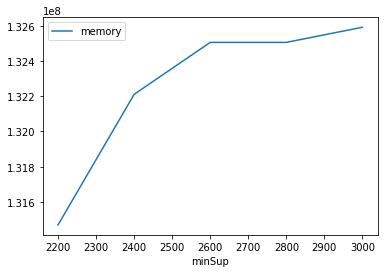

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
